In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values                #Y can be reshaped directly here using [:,-1:]

In [18]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [19]:
Y = Y.reshape(len(Y),1)

In [20]:
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [23]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [24]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

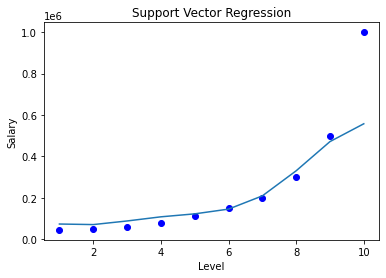

In [25]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color = "blue")
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.title("Support Vector Regression")
plt.xlabel("Level")                       #this is a degree 10 plot 
plt.ylabel("Salary")
plt.show()

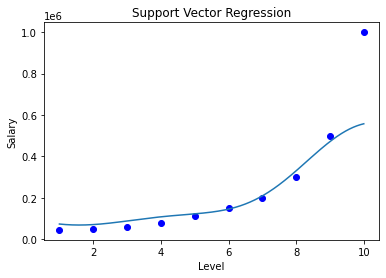

In [29]:
X_grid = np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.0000001)
X_grid = X_grid.reshape(-1,1)
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color = "blue")
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)))
plt.title("Support Vector Regression")
plt.xlabel("Level")                       #this is a degree 10 plot 
plt.ylabel("Salary")
plt.show()